## Nash equilibrium
$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\renewcommand{\a}{\alpha}             $ 
$\renewcommand{\b}{\beta}              $ 
$\renewcommand{\c}{\gamma}             $ 
$\renewcommand{\d}{\delta}             $ 
$\newcommand{\D}{\Delta}               $ 
$\newcommand{\la}{\lambda}             $ 
$\renewcommand{\t}{\tau}               $ 
$\newcommand{\s}{\sigma}               $ 
$\newcommand{\e}{\varepsilon}          $ 
$\renewcommand{\th}{\theta}            $ 
$\newcommand{\x}{\bar x}               $ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\N}{\mathbb N}            $ 
$\newcommand{\Z}{\mathbb Z}            $ 
$\newcommand{\E}{\mathcal E}           $ 
$\newcommand{\lr}[1]{\left\langle #1\right\rangle}$
$\newcommand{\nf}[1]{\nabla f(#1)}     $
$\newcommand{\hx}{\hat x}               $
$\newcommand{\hy}{\hat y}               $
$\DeclareMathOperator{\prox}{prox}      $
$\DeclareMathOperator{\argmin}{argmin}  $
$\DeclareMathOperator{\dom}{dom}        $
$\DeclareMathOperator{\id}{Id}          $
$\DeclareMathOperator{\conv}{conv}      $

Based on paper of P. Harker "A variational inequality approach for the determination of oligopolistic market equlibrium."

Let there be $n$ firms, $i=1,\dots, n$ which supply a homogenous product in a noncooperative fashion. Let $p(Q)$ denote the inverse demand curve, where $Q$ is the total supply in the market. Let $q_i\geq 0$ denote the $i$th firm's supply. Thus, $Q = \sum_{i=1}^n q_i$. Finally, let $f_i(q_i)$ denote the $i$th firm's total cost of supplying $q_i$ units.

A variational inequality that corresponds to the equlibrium is
$$\text{find}\quad q^* = (q_1^*,\dots, q_n^*)\in \R^{n}_+ \quad \text{s.t. } \sum_{i=1}^n \lr{F_i(q^*), q_i - q_i^*}\geq 0,\quad \forall q \in \R^{n}_+,$$
where 
$$F_i(q^*) = f'_i(q_i^*) - p\left(\sum_{j=1}^n q_j^*\right) - q_i^* p'\left(\sum_{j=1}^n q_j^*\right)$$

As a particular example, we assume that the inverse demand function is defined by
$$p(Q) = 5000^{1/\c}Q^{-1/\c}$$
and a total cost function takes form:
$$f_i(q_i) = c_i q_i + \frac{\b_i}{\b_i+1}L_i^{\frac{1}{\b_i}} q_i^{\frac{\b_i+1}{\b_i}}$$

In [8]:
import matplotlib.pyplot as plt
from algorithms import *
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generate some data

In [9]:
n = 1000

np.random.seed(1)

c = np.random.uniform(1,100,n)
L = np.random.uniform(0.5,5,n)
beta = np.random.uniform(0.5, 2,n) # good
#beta = np.random.uniform(0.3, 4,n)
gamma = 1.1
#gamma = 1.5

p = lambda Q: (5000**(1./gamma)) * (Q**(-1./gamma))

def f(q):
    t = 1./beta
    res = c * q + 1./(1.+t)*(L**t * q**(1+t))
    return res

def df(q):
    t = 1./beta
    res = c + (L* q)**t
    return res

dp = lambda Q: -1./gamma * (5000**(1./gamma)) * (Q**(-1./gamma -1))

def F(q):
    Q = q.sum()
    res = df(q) - p(Q) - q*dp(Q)
    return res

g = lambda x: 0
prox_g = lambda q, eps: np.fmax(q,0)
  
# residual
J = lambda x: LA.norm(x-prox_g(x-F(x),1))

# starting point
q0 = np.ones(n)

In [10]:
N = 10000
ans1 = tseng_fbf_linesearch(J, F, prox_g, q0, delta=1.5, numb_iter=N)
ans2 = explicit_graal(J, F, prox_g, q0, numb_iter=N, phi=1.5, output=False)




CPU time for FBF: 5.634273331001168
CPU time for EGRAAL: 3.1662525400170125


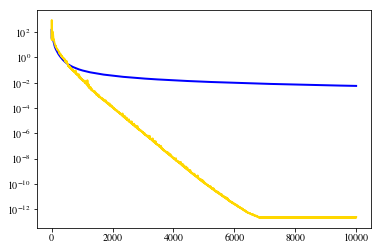

In [11]:
plt.plot(ans1[0], 'b')
plt.plot(ans2[0], '#FFD700')

plt.yscale('log')

Fancy plot:

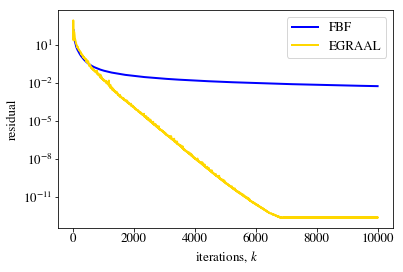

In [12]:
import matplotlib as mpl
mpl.rc('lines', linewidth=2)
mpl.rcParams.update(
    {'font.size': 13, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2

plt.plot(ans1[0], 'b', label = 'FBF')
plt.plot(ans2[0], '#FFD700', label = 'EGRAAL')

plt.yscale('log')

plt.xlabel(u' iterations, $k$')
plt.ylabel(u'residual')

plt.legend()
plt.savefig('nash.pdf')
plt.show()